         vm_pu  va_degree       p_mw   q_mvar
name                                         
Barra 1 1.0000     0.0000 -1104.5243 829.0485
Barra 2 0.9953    -7.4235  1080.0000 523.0679
          p_from_mw  q_from_mvar   p_to_mw  q_to_mvar   pl_mw   ql_mvar  \
name                                                                      
Linea 1A   552.2621    -414.5242 -540.0000  -261.5339 12.2621 -676.0582   
Linea 1B   552.2621    -414.5242 -540.0000  -261.5339 12.2621 -676.0582   

          i_from_ka  i_to_ka   i_ka  vm_from_pu  va_from_degree  vm_to_pu  \
name                                                                        
Linea 1A     0.7973   0.6961 0.7973      1.0000          0.0000    0.9953   
Linea 1B     0.7973   0.6961 0.7973      1.0000          0.0000    0.9953   

          va_to_degree  loading_percent  
name                                     
Linea 1A       -7.4235          79.7349  
Linea 1B       -7.4235          79.7349  


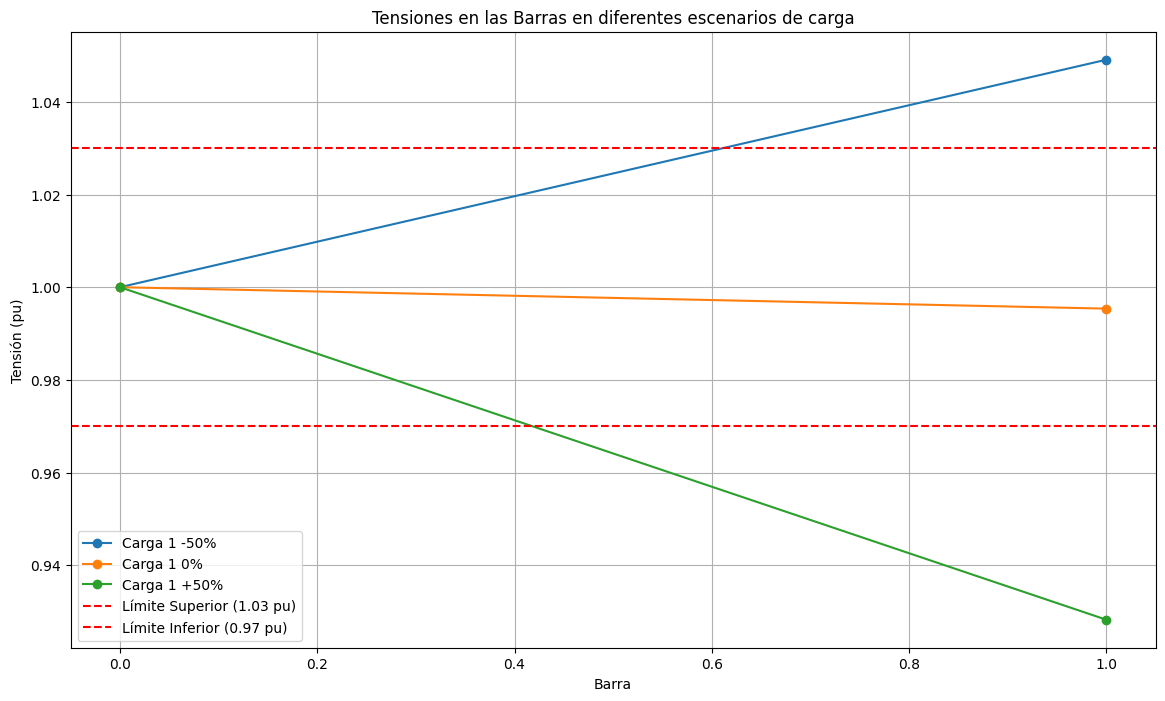

In [9]:

#Sistema 1, Figura 1(a)

# 3.a) Simule y grafique en solo una Figura el comportamiento de la tensión para una carga que cambie en el rango ±50 %
#      de la potencia indicada en la Figura. Justifique teóricamente el resultado.

import numpy as np
import pandas as pd
import pandapower as pp
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# Crear la red a analizar
red1 = pp.create_empty_network()

# Creación de las barras del sistema
barra_1 = pp.create_bus(red1, vn_kv=500, name="Barra 1")
barra_2 = pp.create_bus(red1, vn_kv=500, name="Barra 2")

#crear lineas
pp.create_line_from_parameters(net=red1, from_bus=barra_1, to_bus=barra_2, length_km=500, r_ohm_per_km=0.02,
                               x_ohm_per_km=0.115, c_nf_per_km=19.1, max_i_ka=1, name= "Linea 1A")
pp.create_line_from_parameters(net=red1, from_bus=barra_1, to_bus=barra_2, length_km=500, r_ohm_per_km=0.02,
                               x_ohm_per_km=0.115, c_nf_per_km=19.1, max_i_ka=1, name= "Linea 1B")

#crear generador
# Añadir el generador en la barra 1 y que dicha barra sea la referencia
pp.create_ext_grid(red1, barra_1, va_pu=1.0, name="Slack")


#crear la carga
load1=pp.create_load(red1, barra_2, p_mw=1080.0, q_mvar=523.0678732, name="Carga Barra 2")

# Ejecutar el flujo de carga
pp.runpp(red1, algorithm='nr', numba=False, max_iteration=1000)

# Imprimir los resultados
red1.res_line.index = red1.line.name
red1.res_bus.index = red1.bus.name

print(red1.res_bus)
print(red1.res_line)

# 3.a) Simule y grafique en solo una Figura el comportamiento de la tensión para una carga que cambie en el rango ±50 %
#      de la potencia indicada en la Figura. Justifique teóricamente el resultado.

# Definir la función para variar la carga
def vary_load_and_runpp(net, load_index, percentage_change):
    original_p = net.load.at[load_index, 'p_mw']
    original_q = net.load.at[load_index, 'q_mvar']
    net.load.at[load_index, 'p_mw'] = original_p * (1 + percentage_change)
    net.load.at[load_index, 'q_mvar'] = original_q * (1 + percentage_change)
    pp.runpp(net, algorithm='nr', numba=False, max_iteration=10000, tolerance_mva=1)
    voltages = net.res_bus.vm_pu.copy()
    line_loadings = net.res_line.loading_percent.copy()
    net.load.at[load_index, 'p_mw'] = original_p  # Revertir el cambio
    net.load.at[load_index, 'q_mvar'] = original_q  # Revertir el cambio
    return voltages, line_loadings

# Crear escenarios y registrar resultados
scenarios = {}
for change in [-0.5, 0.0, 0.5]:
    scenario_name = f"Carga {load1 + 1} {'+' if change > 0 else ''}{int(change * 100)}%"
    voltages, line_loadings = vary_load_and_runpp(red1, load1, change)
    if voltages is not None and line_loadings is not None:
        scenarios[scenario_name] = {
            "voltages": voltages,
            "line_loadings": line_loadings
        }

# Graficar los resultados de tensión
plt.figure(figsize=(14, 8))
for scenario, data in scenarios.items():
    plt.plot(red1.res_bus.index, data["voltages"], marker='o', linestyle='-', label=scenario)
plt.axhline(y=1.03, color='r', linestyle='--', label='Límite Superior (1.03 pu)')
plt.axhline(y=0.97, color='r', linestyle='--', label='Límite Inferior (0.97 pu)')
plt.xlabel('Barra')
plt.ylabel('Tensión (pu)')
plt.title('Tensiones en las Barras en diferentes escenarios de carga')
plt.legend()
plt.grid(True)
plt.show()



numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba 

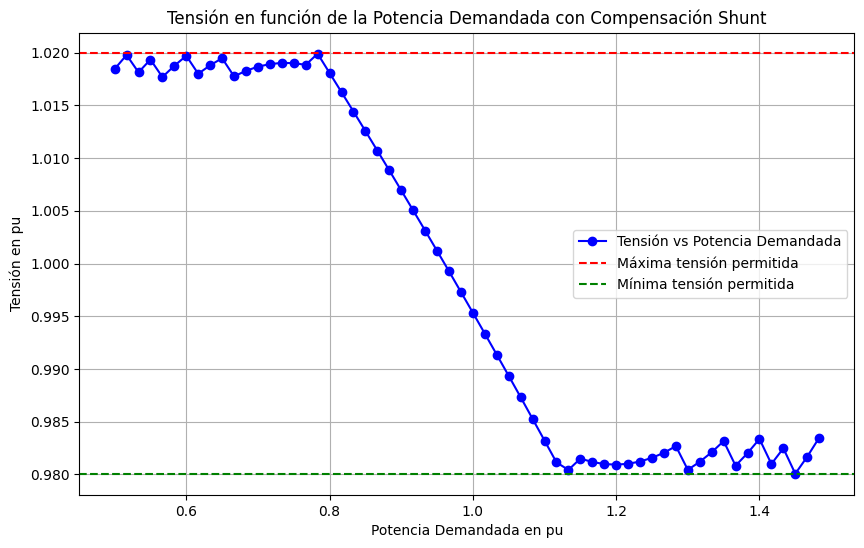

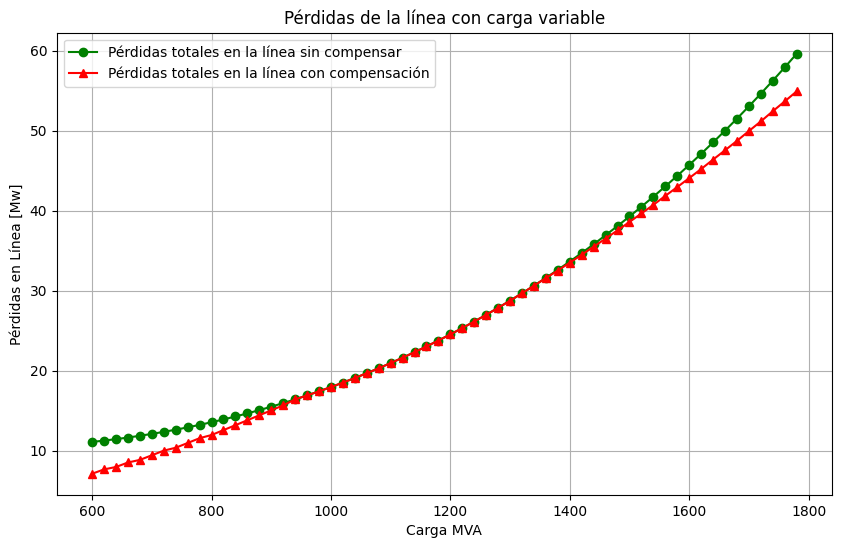

In [28]:
#Sistema 1, Figura 1(a)

#3.b) Para el mismo rango de operación, calcule la compensación shunt necesaria para que la tensión esté dentro de los
#     valores indicados por la normativa. Muestre los resultados a través de solo una Figura que contenga gráficos de tensión
#     en por unidad versus potencia demandada en por unidad.

import numpy as np
import pandas as pd
import pandapower as pp
import matplotlib.pyplot as plt
import math as mm

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# Variables auxiliares para guardar datos
Tension = []
Tension_comp = []
Per_Pot_linea = []
Per_Pot_linea_comp = []
React_comp = []
S_carga = []
S_carga_pu = []

for S_sistema in range(600, 1800, 20):
    Red1 = pp.create_empty_network()
    Barra_1 = pp.create_bus(Red1, vn_kv=500, name="Barra 1")
    Barra_2 = pp.create_bus(Red1, vn_kv=500, name="Barra 2")
    S_carga.append(S_sistema)
    S_carga_pu.append(S_sistema/1200)
    # Calculo potencias en carga
    FP_carga = 0.9
    P_carga = round(S_sistema * FP_carga, 1)
    Q_carga = round(S_sistema * mm.sqrt(1 - FP_carga ** 2), 1)

    # Elemento barra
    pp.create_ext_grid(Red1, bus=Barra_1, vm_pu=1.0, name="Generador")
    pp.create_load(Red1, bus=Barra_2, p_mw=P_carga, q_mvar=Q_carga, name="Carga")
    pp.create_line_from_parameters(net=Red1, from_bus=Barra_1, to_bus=Barra_2, length_km=500, r_ohm_per_km=0.02,
                                   x_ohm_per_km=0.115, c_nf_per_km=19.1, max_i_ka=1, name="Linea 1A")
    pp.create_line_from_parameters(net=Red1, from_bus=Barra_1, to_bus=Barra_2, length_km=500, r_ohm_per_km=0.02,
                                   x_ohm_per_km=0.115, c_nf_per_km=19.1, max_i_ka=1, name="Linea 1B")
    # Flujo
    pp.runpp(Red1)
    Comp_tension_barra_2 = Red1.res_bus.at[Barra_2, 'vm_pu']
    Tension.append(Red1.res_bus.at[Barra_2, 'vm_pu'])
    Per_Pot_linea.append(Red1.res_line.loc[0, 'pl_mw'] * 2)

    # Calculo iterativo de compensacion en barras
    if Comp_tension_barra_2 > 1.02:  # Caso sobretension, aplicar inductancia shunt
        for comp_ind in range(10, 1000, 1):
            pp.create_shunt(Red1, bus=Barra_2, p_mw=0, q_mvar=comp_ind, in_service=True)
            pp.runpp(Red1)
            if Red1.res_bus.at[Barra_2, 'vm_pu'] <= 1.02:
                Tension_comp.append(Red1.res_bus.at[Barra_2, 'vm_pu'])
                Per_Pot_linea_comp.append(Red1.res_line.loc[0, 'pl_mw'] * 2)
                React_comp.append(comp_ind)
                break
    elif Comp_tension_barra_2 < 0.98:  # Caso baja tension, aplicar capacitor shunt
        for comp_cap in range(10, 1000, 1):
            pp.create_shunt(Red1, bus=Barra_2, p_mw=0, q_mvar=-1 * comp_cap, in_service=True)
            pp.runpp(Red1)
            if Red1.res_bus.at[Barra_2, 'vm_pu'] >= 0.98:
                Tension_comp.append(Red1.res_bus.at[Barra_2, 'vm_pu'])
                Per_Pot_linea_comp.append(Red1.res_line.loc[0, 'pl_mw'] * 2)
                React_comp.append(-1 * comp_cap)
                break
    else:
        Tension_comp.append(Red1.res_bus.at[Barra_2, 'vm_pu'])
        Per_Pot_linea_comp.append(Red1.res_line.loc[0, 'pl_mw'] * 2)
        React_comp.append(0)


# Gráfico de los resultados
plt.figure(figsize=(10, 6))
plt.plot(S_carga_pu, Tension_comp, marker='o', linestyle='-', color='b', label='Tensión vs Potencia Demandada')
plt.axhline(y=1.02, color='r', linestyle='--', label='Máxima tensión permitida')
plt.axhline(y=0.98, color='g', linestyle='--', label='Mínima tensión permitida')
plt.xlabel('Potencia Demandada en pu')
plt.ylabel('Tensión en pu')
plt.title('Tensión en función de la Potencia Demandada con Compensación Shunt')
plt.legend()
plt.grid(True)
plt.show()


#3.c) Grafique en solo una Figura las pérdidas en la línea para todo el rango de potencia demandada y todo el rango de
#     compensación que escogió. En la misma Figura deberá indicar una curva de las pérdidas sin compensación. Justifique
#     teóricamente los resultados y comente.

plt.figure(figsize=(10, 6))
plt.plot(S_carga, Per_Pot_linea, marker ='o', linestyle='-', color='g', label='Pérdidas totales en la línea sin compensar')
plt.plot(S_carga, Per_Pot_linea_comp, marker ='^', linestyle='-', color='r', label='Pérdidas totales en la línea con compensación')
plt.xlabel('Carga MVA')
plt.ylabel('Pérdidas en Línea [Mw]')
plt.title('Pérdidas de la línea con carga variable')
plt.legend()
plt.grid(True)
plt.show()

# Comentarios
# Se entrega la potencia total de las dos lineas en paralelo, por eso que el codigo llega en algunas partes una multiplicación por 2.
# De la gráfica se puede concluir que la línea tiene menores pérdidas cuando es compensada, esto se vuelve más relevante cuanto mayor es
# la variación de la carga original, tanto cuando se disminuye como cuando se aumenta.

          vm_pu  va_degree      p_mw  q_mvar
name                                        
Barra 1  1.0000     0.0000 -212.3102  5.8073
Barra 2  1.0334   -14.2765    0.0000  0.0000
Barra 1A 1.0315   -14.4923   30.0000 20.0000
Barra 1B 1.0324   -14.4698   15.0000 10.0000
Barra 2A 1.0292   -14.7303   52.5000 35.0000
Barra 2B 1.0274   -14.8735   90.0000 60.0000
Barra 3A 1.0284   -14.8649   22.5000 15.0000
        p_from_mw  q_from_mvar   p_to_mw  q_to_mvar  pl_mw  ql_mvar  \
name                                                                  
L2-1A    116.8068     -22.3856 -116.5426     2.5430 0.2642 -19.8426   
L2-1B     94.2749     -37.5516  -94.0903    17.5655 0.1846 -19.9860   
L1A-2A    86.5426     -22.5430  -86.3250    -7.3809 0.2176 -29.9238   
L2A-3A    33.8250     -27.6191  -33.7786   -12.5423 0.0463 -40.1614   
L1B-2B    79.0903     -27.5655  -78.7297   -32.3478 0.3606 -59.9134   
L2B-3A   -11.2703     -27.6522   11.2786    -2.4577 0.0083 -30.1099   

        i_from_ka  i_to_ka

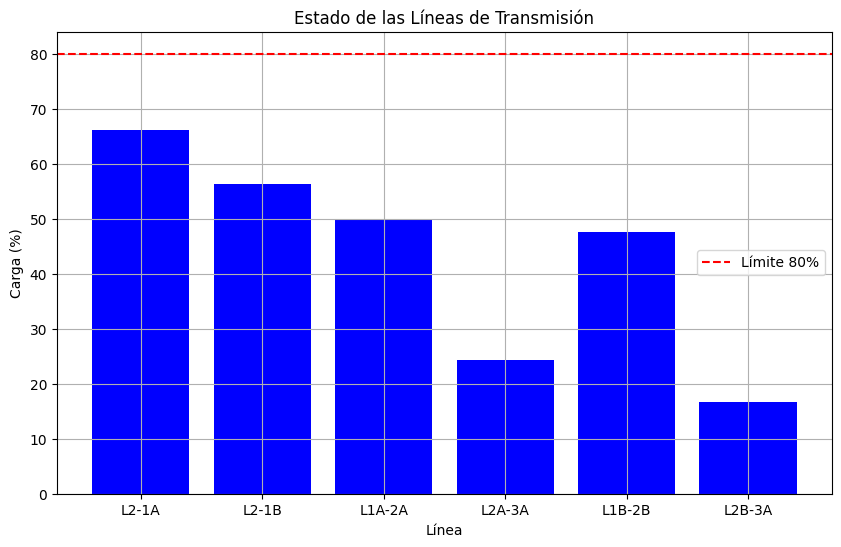

In [11]:
#Sistema 2, Figura 1(b)

#4.a)Identifique las líneas que se encuentran saturadas o fuera de norma en las condiciones iniciales del problema. 
#    Haga un gráfico que indique el estado de cada línea y proponga un método para resolver este problema

import numpy as np
import pandas as pd
import pandapower as pp
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))


# Crear la red a analizar
red2 = pp.create_empty_network()

# Creación de las barras del sistema
barra_1 = pp.create_bus(red2, vn_kv=110, name="Barra 1")
barra_2 = pp.create_bus(red2, vn_kv=220, name="Barra 2")
barra_1A = pp.create_bus(red2, vn_kv=220, name="Barra 1A")
barra_1B = pp.create_bus(red2, vn_kv=220, name="Barra 1B")
barra_2A = pp.create_bus(red2, vn_kv=220, name="Barra 2A")
barra_2B = pp.create_bus(red2, vn_kv=220, name="Barra 2B")
barra_3A = pp.create_bus(red2, vn_kv=220, name="Barra 3A")

# Añadir transformador entre barra 1 y 2
pp.create_transformer(red2, barra_2, barra_1, std_type="100 MVA 220/110 kV")

# Añadir el generador en la barra 1 y que dicha barra sea la referencia
pp.create_ext_grid(red2, barra_1, va_pu=1.0, name="Slack")

# Crear las líneas
pp.create_line(red2, barra_2, barra_1A, length_km=10.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L2-1A")
pp.create_line(red2, barra_2, barra_1B, length_km=10.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L2-1B")
pp.create_line(red2, barra_1A, barra_2A, length_km=15.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L1A-2A")
pp.create_line(red2, barra_2A, barra_3A, length_km=20.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L2A-3A")
pp.create_line(red2, barra_1B, barra_2B, length_km=30.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L1B-2B")
pp.create_line(red2, barra_2B, barra_3A, length_km=15.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L2B-3A")

# Crear las cargas
pp.create_load(red2, barra_1A, p_mw=30.0, q_mvar=20.0, name="Carga Barra 1A")
pp.create_load(red2, barra_2A, p_mw=52.5, q_mvar=35.0, name="Carga Barra 2A")
pp.create_load(red2, barra_3A, p_mw=22.5, q_mvar=15.0, name="Carga Barra 3A")
pp.create_load(red2, barra_1B, p_mw=15.0, q_mvar=10.0, name="Carga Barra 1B")
pp.create_load(red2, barra_2B, p_mw=90.0, q_mvar=60.0, name="Carga Barra 2B")

# Ejecutar el flujo de carga
pp.runpp(red2, algorithm='nr', numba=False, max_iteration=1000)

# Imprimir los resultados
red2.res_line.index = red2.line.name
red2.res_bus.index = red2.bus.name

print(red2.res_bus)
print(red2.res_line)

# Identificar líneas saturadas
saturated_lines = red2.res_line[red2.res_line.loading_percent > 80]

# Graficar el estado de cada línea
plt.figure(figsize=(10, 6))
plt.bar(red2.res_line.index, red2.res_line.loading_percent, color='blue')
plt.axhline(y=80, color='r', linestyle='--', label='Límite 80%')
plt.xlabel('Línea')
plt.ylabel('Carga (%)')
plt.title('Estado de las Líneas de Transmisión')
plt.legend()
plt.grid(True)
plt.show()

#4.a)Identifique las líneas que se encuentran saturadas o fuera de norma en las condiciones iniciales del problema. 
#    Haga un gráfico que indique el estado de cada línea y proponga un método para resolver este problema.

# Para el sistema analizado se tiene que todas las líneas están por debajo del limite del 80% de potencia transmitida, por lo cual se
# encuentran dentro de la norma. De todas manera se describirá a continuación un método para abordar dicho problema planteado.
#
# Método para solucionar la saturación y/o valor fuera de norma:
# Reconfiguración de la Red
# Descripción.
#   La reconfiguración de la red implica cambiar la topología de la red eléctrica mediante la operación de interruptores y seccionadores. 
#   Esto permite alterar el flujo de potencia de manera que se alivie la carga en las líneas saturadas y se distribuya mejor la carga en la red.
# Implementación.
# Monitoreo y Análisis de la Red: 
#   Utilizar sistemas SCADA y herramientas de análisis de flujo de potencia para entender cómo está fluyendo la potencia en la red 
#   y dónde se encuentran las sobrecargas.
# Identificación de Puntos de Operación: 
#   Determinar qué interruptores y seccionadores pueden ser operados para cambiar la topología de la red.
# Simulación de Configuraciones: 
#   Ejecutar simulaciones de diferentes configuraciones de red para identificar la configuración que mejor alivie las sobrecargas 
#   sin comprometer la estabilidad y seguridad del sistema.
# Operación de Interruptores: 
#   Realizar las operaciones necesarias en los interruptores y seccionadores para implementar la nueva configuración de red.



Tensiones en kV:
   vm_pu    vm_kv
0 1.0000 110.0000
1 1.0334 227.3436
2 1.0315 226.9206
3 1.0324 227.1224
4 1.0292 226.4322
5 1.0274 226.0357
6 1.0284 226.2402


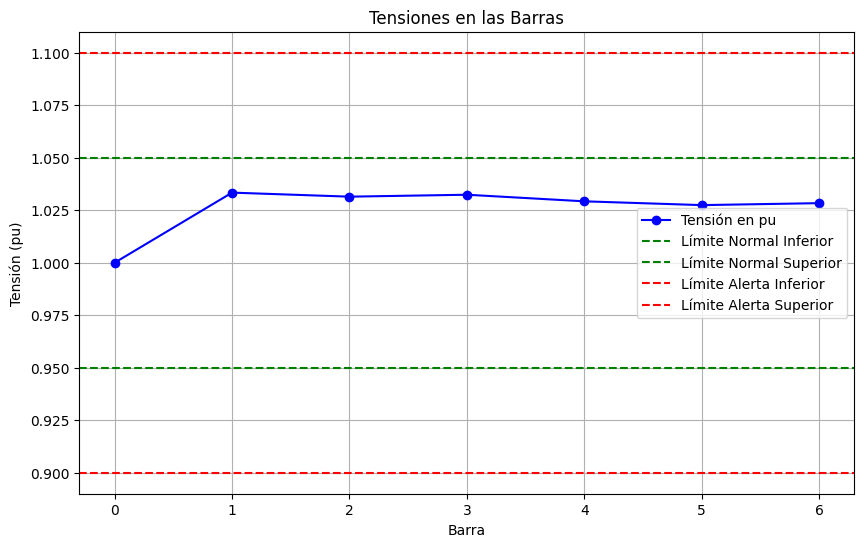

In [12]:
#Sistema 2, Figura 1(b)

#4.b) Indique si las tensiones en las barras se encuentran fuera de norma considerando dos escenarios:
#   • Escenario 1: Estado normal
#   • Escenario 2: Estado de alerta

import numpy as np
import pandas as pd
import pandapower as pp
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))


# Crear la red a analizar
red2 = pp.create_empty_network()

# Creación de las barras del sistema
barra_1 = pp.create_bus(red2, vn_kv=110, name="Barra 1")
barra_2 = pp.create_bus(red2, vn_kv=220, name="Barra 2")
barra_1A = pp.create_bus(red2, vn_kv=220, name="Barra 1A")
barra_1B = pp.create_bus(red2, vn_kv=220, name="Barra 1B")
barra_2A = pp.create_bus(red2, vn_kv=220, name="Barra 2A")
barra_2B = pp.create_bus(red2, vn_kv=220, name="Barra 2B")
barra_3A = pp.create_bus(red2, vn_kv=220, name="Barra 3A")

# Añadir transformador entre barra 1 y 2
pp.create_transformer(red2, barra_2, barra_1, std_type="100 MVA 220/110 kV")

# Añadir el generador en la barra 1 y que dicha barra sea la referencia
pp.create_ext_grid(red2, barra_1, va_pu=1.0, name="Slack")

# Crear las líneas
pp.create_line(red2, barra_2, barra_1A, length_km=10.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L2-1A")
pp.create_line(red2, barra_2, barra_1B, length_km=10.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L2-1B")
pp.create_line(red2, barra_1A, barra_2A, length_km=15.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L1A-2A")
pp.create_line(red2, barra_2A, barra_3A, length_km=20.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L2A-3A")
pp.create_line(red2, barra_1B, barra_2B, length_km=30.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L1B-2B")
pp.create_line(red2, barra_2B, barra_3A, length_km=15.0, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="L2B-3A")

# Crear las cargas
pp.create_load(red2, barra_1A, p_mw=30.0, q_mvar=20.0, name="Carga Barra 1A")
pp.create_load(red2, barra_2A, p_mw=52.5, q_mvar=35.0, name="Carga Barra 2A")
pp.create_load(red2, barra_3A, p_mw=22.5, q_mvar=15.0, name="Carga Barra 3A")
pp.create_load(red2, barra_1B, p_mw=15.0, q_mvar=10.0, name="Carga Barra 1B")
pp.create_load(red2, barra_2B, p_mw=90.0, q_mvar=60.0, name="Carga Barra 2B")

# Ejecutar el flujo de carga
pp.runpp(red2, algorithm='nr', numba=False, max_iteration=1000)

# Calcular tensiones en kV
red2.res_bus['vn_kv'] = red2.bus.vn_kv.values
red2.res_bus['vm_kv'] = red2.res_bus['vm_pu'] * red2.res_bus['vn_kv']

# Mostrar tensiones en kV
print("Tensiones en kV:")
print(red2.res_bus[['vm_pu', 'vm_kv']])


# Definir los límites de tensión
limite_inferior_normal = 0.95
limite_superior_normal = 1.05
limite_inferior_alerta = 0.90
limite_superior_alerta = 1.10


# Graficar las tensiones
plt.figure(figsize=(10, 6))
plt.plot(red2.res_bus.index, red2.res_bus.vm_pu, marker='o', linestyle='-', color='blue', label='Tensión en pu')
plt.axhline(y=limite_inferior_normal, color='g', linestyle='--', label='Límite Normal Inferior')
plt.axhline(y=limite_superior_normal, color='g', linestyle='--', label='Límite Normal Superior')
plt.axhline(y=limite_inferior_alerta, color='r', linestyle='--', label='Límite Alerta Inferior')
plt.axhline(y=limite_superior_alerta, color='r', linestyle='--', label='Límite Alerta Superior')
plt.xlabel('Barra')
plt.ylabel('Tensión (pu)')
plt.title('Tensiones en las Barras')
plt.legend()
plt.grid(True)
plt.show()


#4.b) Indique si las tensiones en las barras se encuentran fuera de norma considerando dos escenarios:
#   • Escenario 1: Estado normal
#   • Escenario 2: Estado de alerta

#Escenarios tensiones en las barras
#   Las tesniones en las barras en todos los casos se encuentran dentro de la norma con una fluctación dentro del rango de 0.95 a 1.05 pu
#   para tensiones comprendidas entre los 200 a 500 [kv]



#4.c) Proponga medidas para llevar a su sistema a puntos de operación dentro de norma en ambos escenarios. 
#     Haga su justificación acompañada de una Figura que muestre resultados relevantes.

# Para el caso que las tensiones en las barras estén en estado de alerta o energencia se deberá realizar las siguientes operaciones con tal
# de llegar la tensión dentro de los margenes del Estado normal:
#   a) Conexión o desconexión de bancos de condensadores shunt.
#   b) Conexión o desconexión de condensadores síncronos.
#   c) Conexión o desconexión de reactores shunt.
#   d) Operación de compensadores estáticos de potencia reactiva.
#   e) Operación de cambiadores de taps bajo carga de transformadores.
#   f) Operación de centrales generadoras con capacidad de inyectar o absorber potencia reactiva.
#   g) Modificación de consigna de equipos de compensación reactiva activos (STATCOM).
#   h) Modificación de la potencia de referencia de los convertidores HVDC
# No se presenta una justificación en figura ya que el sistema se encuentra dentro de el rango de operación normal para todas las barras del
# sistema analizado.



#4.d) Investigue al menos tres métodos que se utilicen para llevar a un estado normal el sistema.

    #1. Método de reserva de potencia reactiva.
    #   Mantener reservas adecuadas de potencia reactiva es esencial para el soporte de la tensión, especialmente en condiciones de carga 
    #   variable o eventos contingentes. Esto incluye:
    #   Reservas en Generadores:
    #   Generadores que operan con capacidad adicional para proporcionar o absorber potencia reactiva según sea necesario.
    #   Operación dentro de un diagrama P-Q que define la capacidad del generador para manejar diferentes combinaciones de potencia 
    #   activa y reactiva.
    #   Parques Eólicos y Fotovoltaicos:
    #   Estos parques también deben mantener una capacidad de inyección o absorción de potencia reactiva para apoyar el control 
    #   de la tensión en redes con alta penetración de energías renovables.

    #2. Compensación de Potencia Reactiva.
    #   La compensación de potencia reactiva es crucial para el control de la tensión y la mejora de la eficiencia del sistema. 
    #   Los métodos incluyen:
    #   Compensadores Estáticos y Síncronos:
    #   Compensadores Síncronos: Máquinas eléctricas que pueden generar o absorber potencia reactiva, proporcionando un ajuste 
    #   dinámico de la tensión.
    #   Compensadores Estáticos (SVCs): Dispositivos basados en electrónica de potencia que regulan la potencia reactiva inyectada 
    #   o absorbida en el sistema. Incluyen capacitores y reactores controlados por tiristores (TCR, TSC).
    #   Bancos de Condensadores Shunt:
    #   Se conectan o desconectan automáticamente para proporcionar o absorber potencia reactiva, ajustando así la tensión del sistema.
    #   Reactores Shunt:
    #   Similar a los bancos de condensadores, pero utilizados para absorber potencia reactiva y reducir la tensión en el sistema.
    #   Transformadores con Cambiadores de Tap bajo Carga:
    #   Permiten ajustar la relación de transformación bajo carga, cambiando así la tensión en el lado secundario del transformador sin interrumpir el servicio.
    #   Operación de Centrales Generadoras:
    #   Las centrales pueden ajustar la cantidad de potencia reactiva que generan o absorben, operando dentro de su capacidad 
    #   especificada por el diagrama P-Q (potencia activa vs. potencia reactiva).

    #3. Manejo de Contingencias
    #   El manejo de contingencias implica prever y gestionar eventos que puedan perturbar el sistema, como la falla de una línea 
    #   de transmisión o un generador. Las estrategias incluyen:
    #   Simulación de Contingencias:
    #   Realización de estudios de flujo de carga y análisis de estabilidad para diferentes escenarios de fallas.
    #   Ajuste de las configuraciones del sistema y los recursos disponibles para asegurar que el sistema pueda soportar estas 
    #   contingencias sin violar los límites de tensión o estabilidad.
    #   Ajustes de Operación:
    #   Modificación de la operación del sistema basado en los resultados de las simulaciones para asegurar que se mantengan 
    #   las tensiones dentro de los límites aceptables durante y después de una contingencia.



Resultados antes de desconectar la línea 3A-2B:
   vm_pu  va_degree      p_mw  q_mvar
0 1.0000     0.0000 -212.3102  5.8073
1 1.0334   -14.2765    0.0000  0.0000
2 1.0315   -14.4923   30.0000 20.0000
3 1.0324   -14.4698   15.0000 10.0000
4 1.0292   -14.7303   52.5000 35.0000
5 1.0274   -14.8735   90.0000 60.0000
6 1.0284   -14.8649   22.5000 15.0000
   p_from_mw  q_from_mvar   p_to_mw  q_to_mvar  i_from_ka  i_to_ka  \
0   116.8068     -22.3856 -116.5426     2.5430     0.3020   0.2966   
1    94.2749     -37.5516  -94.0903    17.5655     0.2577   0.2433   
2    86.5426     -22.5430  -86.3250    -7.3809     0.2275   0.2209   
3    33.8250     -27.6191  -33.7786   -12.5423     0.1113   0.0920   
4    79.0903     -27.5655  -78.7297   -32.3478     0.2129   0.2174   
5   -11.2703     -27.6522   11.2786    -2.4577     0.0763   0.0295   

   loading_percent  
0          66.0908  
1          56.3916  
2          49.7891  
3          24.3643  
4          47.5727  
5          16.6896  
Resultados

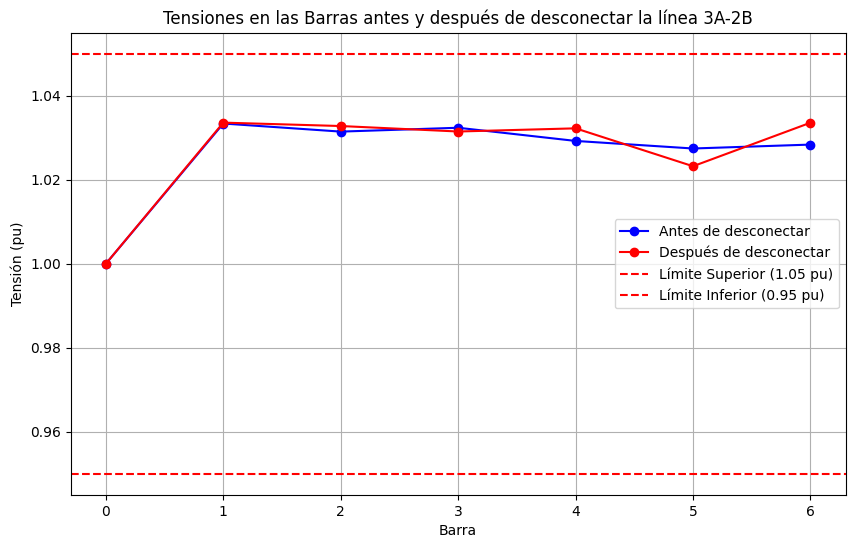

In [13]:
#Sistema 2, Figura 1(b)

#4.e) Implemente una medida en un escenario de estado normal de operación y desconecte la línea 3A-2B (a través de los
#     switches indicados) indicada en la Figura. Comente con respecto al comportamiento de las variables en el sistema ante
#     el cambio en la topología

import numpy as np
import pandas as pd
import pandapower as pp
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# Crear la red a analizar
red2 = pp.create_empty_network()

# Creación de las barras del sistema
barra_1 = pp.create_bus(red2, vn_kv=110, name="Barra 1")
barra_2 = pp.create_bus(red2, vn_kv=220, name="Barra 2")
barra_1A = pp.create_bus(red2, vn_kv=220, name="Barra 1A")
barra_1B = pp.create_bus(red2, vn_kv=220, name="Barra 1B")
barra_2A = pp.create_bus(red2, vn_kv=220, name="Barra 2A")
barra_2B = pp.create_bus(red2, vn_kv=220, name="Barra 2B")
barra_3A = pp.create_bus(red2, vn_kv=220, name="Barra 3A")

# Añadir transformador entre barra 1 y 2
pp.create_transformer(red2, barra_2, barra_1, std_type="100 MVA 220/110 kV")

# Añadir el generador en la barra 1 y que dicha barra sea la referencia
pp.create_ext_grid(red2, barra_1, va_pu=1.0, name="Slack")

# Crear las líneas 
linea= "N2XS(FL)2Y 1x185 RM/35 64/110 kV"  # Línea
# Crear las líneas
pp.create_line(red2, barra_2, barra_1A, length_km=10.0, std_type=linea, name="L2-1A")
pp.create_line(red2, barra_2, barra_1B, length_km=10.0, std_type=linea, name="L2-1B")
pp.create_line(red2, barra_1A, barra_2A, length_km=15.0, std_type=linea, name="L1A-2A")
pp.create_line(red2, barra_2A, barra_3A, length_km=20.0, std_type=linea, name="L2A-3A")
pp.create_line(red2, barra_1B, barra_2B, length_km=30.0, std_type=linea, name="L1B-2B")
line2B3A = pp.create_line(red2, barra_2B, barra_3A, length_km=15.0, std_type=linea, name="L2B-3A")

# Crear las cargas
pp.create_load(red2, barra_1A, p_mw=30.0, q_mvar=20.0, name="Carga Barra 1A")
pp.create_load(red2, barra_2A, p_mw=52.5, q_mvar=35.0, name="Carga Barra 2A")
pp.create_load(red2, barra_3A, p_mw=22.5, q_mvar=15.0, name="Carga Barra 3A")
pp.create_load(red2, barra_1B, p_mw=15.0, q_mvar=10.0, name="Carga Barra 1B")
pp.create_load(red2, barra_2B, p_mw=90.0, q_mvar=60.0, name="Carga Barra 2B")

# Ejecutar el flujo de carga
pp.runpp(red2, algorithm='nr', numba=False, max_iteration=1000)


#4.e) Implemente una medida en un escenario de estado normal de operación y desconecte la línea 3A-2B (a través de los
#     switches indicados) indicada en la Figura. Comente con respecto al comportamiento de las variables en el sistema ante
#     el cambio en la topología


# Imprimir los resultados antes de desconectar la línea
print("Resultados antes de desconectar la línea 3A-2B:")
print(red2.res_bus)
print(red2.res_line[['p_from_mw', 'q_from_mvar', 'p_to_mw', 'q_to_mvar', 'i_from_ka', 'i_to_ka', 'loading_percent']])

# Graficar las tensiones en las barras antes y después de desconectar la línea
voltages_before = red2.res_bus.vm_pu

# Desconectar la línea 3A-2B utilizando switches
switch_1 = pp.create_switch(red2, bus=barra_2B, element=line2B3A, et='l', closed=False, name="Switch 3A-2B")

pp.runpp(red2, algorithm='nr', numba=False, max_iteration=1000)
voltages_after = red2.res_bus.vm_pu

# Imprimir los resultados después de desconectar la línea
print("Resultados después de desconectar la línea 3A-2B:")
print(red2.res_bus)
print(red2.res_line[['p_from_mw', 'q_from_mvar', 'p_to_mw', 'q_to_mvar', 'i_from_ka', 'i_to_ka', 'loading_percent']])

plt.figure(figsize=(10, 6))
plt.plot(red2.res_bus.index, voltages_before, marker='o', linestyle='-', color='blue', label='Antes de desconectar')
plt.plot(red2.res_bus.index, voltages_after, marker='o', linestyle='-', color='red', label='Después de desconectar')
plt.axhline(y=1.05, color='r', linestyle='--', label='Límite Superior (1.05 pu)')
plt.axhline(y=0.95, color='r', linestyle='--', label='Límite Inferior (0.95 pu)')
plt.xlabel('Barra')
plt.ylabel('Tensión (pu)')
plt.title('Tensiones en las Barras antes y después de desconectar la línea 3A-2B')
plt.legend()
plt.grid(True)
plt.show()


#Cambios de la tensión al desconectar línea 3A-2B
# De la barra 1 de referencia (0), barra 2 (1), barra 1A (2) y barra 2A (3) no se aprecian variaciones significativa ante la contingencia.
# En cuanto las barras 3A y 2B (4 y 6) se ve un aumento en sus tensiones al momento de la contingencia pero manteniendose dentro de los 
# márgenes de operación normal.
# De la barra 1B (5) se aprecia una disminución de su tensión, pero al igual que las barras 3A Y 2B se mantiene dentro de los márgenes 
# de operación normal.

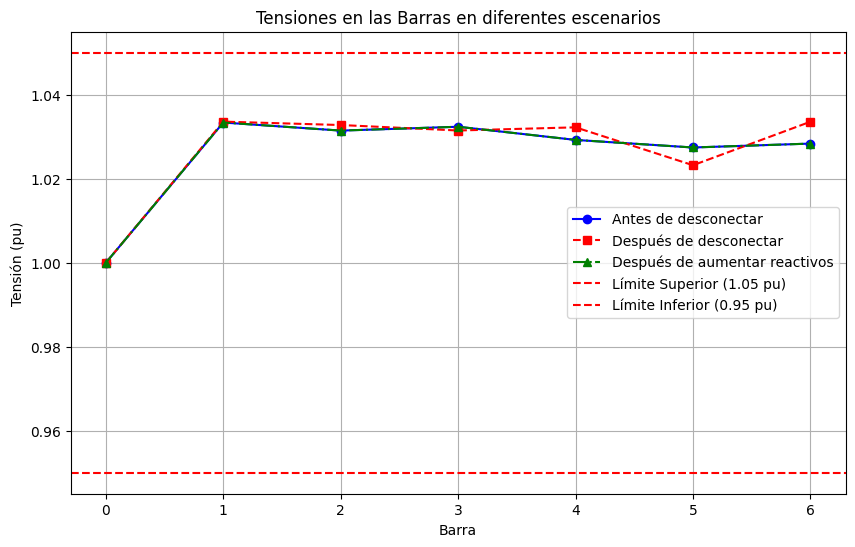

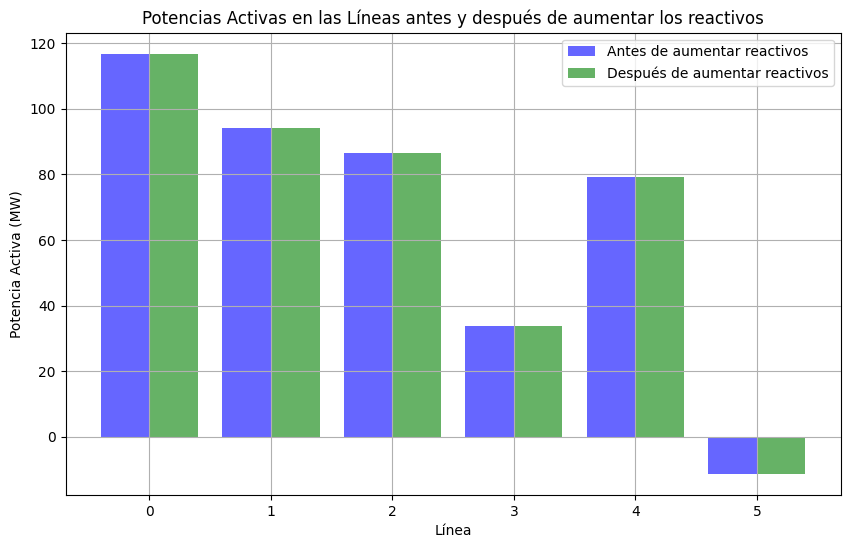

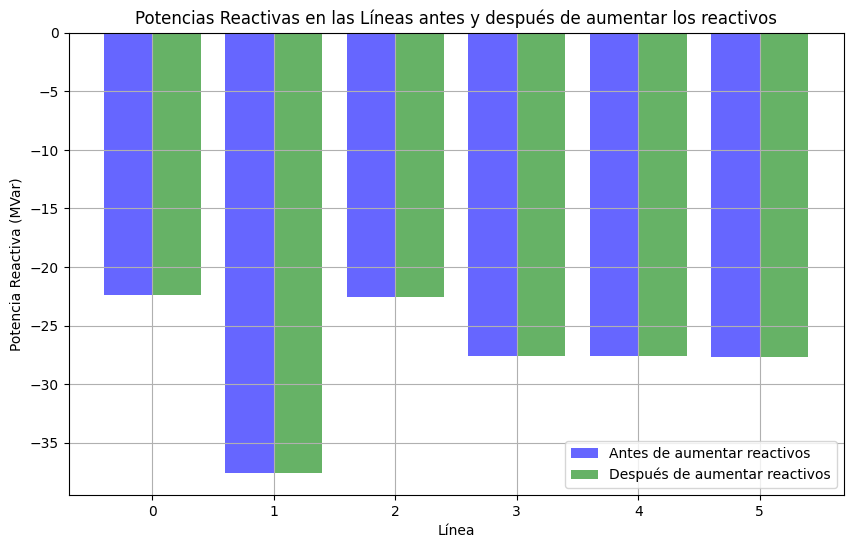

In [14]:
#Sistema 2, Figura 1(b)

#4.f) Vuelva a conectar la línea e inyecte un 20% más de reactivos desde el generador y analice el comportamiento de las
#     variables del sistema. Comente y muestre resultados en una Figura.

import numpy as np
import pandas as pd
import pandapower as pp
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# Crear la red a analizar
red2 = pp.create_empty_network()

# Creación de las barras del sistema
barra_1 = pp.create_bus(red2, vn_kv=110, name="Barra 1")
barra_2 = pp.create_bus(red2, vn_kv=220, name="Barra 2")
barra_1A = pp.create_bus(red2, vn_kv=220, name="Barra 1A")
barra_1B = pp.create_bus(red2, vn_kv=220, name="Barra 1B")
barra_2A = pp.create_bus(red2, vn_kv=220, name="Barra 2A")
barra_2B = pp.create_bus(red2, vn_kv=220, name="Barra 2B")
barra_3A = pp.create_bus(red2, vn_kv=220, name="Barra 3A")

# Añadir transformador entre barra 1 y 2
pp.create_transformer(red2, barra_2, barra_1, std_type="100 MVA 220/110 kV")

# Añadir el generador en la barra 1 y que dicha barra sea la referencia
ext_grid_index = pp.create_ext_grid(red2, barra_1, va_pu=1.0, name="Slack")

# Crear las líneas
linea = "N2XS(FL)2Y 1x185 RM/35 64/110 kV"  # Línea

# Crear las líneas
pp.create_line(red2, barra_2, barra_1A, length_km=10.0, std_type=linea, name="L2-1A")
pp.create_line(red2, barra_2, barra_1B, length_km=10.0, std_type=linea, name="L2-1B")
pp.create_line(red2, barra_1A, barra_2A, length_km=15.0, std_type=linea, name="L1A-2A")
pp.create_line(red2, barra_2A, barra_3A, length_km=20.0, std_type=linea, name="L2A-3A")
pp.create_line(red2, barra_1B, barra_2B, length_km=30.0, std_type=linea, name="L1B-2B")
line2B3A = pp.create_line(red2, barra_2B, barra_3A, length_km=15.0, std_type=linea, name="L2B-3A")

# Crear las cargas
pp.create_load(red2, barra_1A, p_mw=30.0, q_mvar=20.0, name="Carga Barra 1A")
pp.create_load(red2, barra_2A, p_mw=52.5, q_mvar=35.0, name="Carga Barra 2A")
pp.create_load(red2, barra_3A, p_mw=22.5, q_mvar=15.0, name="Carga Barra 3A")
pp.create_load(red2, barra_1B, p_mw=15.0, q_mvar=10.0, name="Carga Barra 1B")
pp.create_load(red2, barra_2B, p_mw=90.0, q_mvar=60.0, name="Carga Barra 2B")

# Ejecutar el flujo de carga
pp.runpp(red2, algorithm='nr', numba=False, max_iteration=1000)


#4.f) Vuelva a conectar la línea e inyecte un 20% más de reactivos desde el generador y analice el comportamiento de las
#     variables del sistema. Comente y muestre resultados en una Figura.


# Guardar resultados antes de aumentar los reactivos
p_from_mw_before = red2.res_line.p_from_mw.copy()
q_from_mvar_before = red2.res_line.q_from_mvar.copy()

# Aumentar la inyección de reactivos en un 20%
original_q_mvar = red2.res_ext_grid['q_mvar'].iloc[0] if 'q_mvar' in red2.res_ext_grid else 0
new_q_mvar = original_q_mvar * 1.20 if original_q_mvar != 0 else 0.20  # Aumenta un 20%

# Actualizar la inyección de reactivos en el generador slack usando el índice correcto
red2.ext_grid.at[ext_grid_index, 'max_q_mvar'] = new_q_mvar
red2.ext_grid.at[ext_grid_index, 'min_q_mvar'] = -new_q_mvar  # También actualizamos el mínimo para ser coherentes

# Ejecutar el flujo de carga después de la reconexión y aumento de reactivos
pp.runpp(red2, algorithm='nr', numba=False, max_iteration=1000)

# Guardar resultados después de aumentar los reactivos
p_from_mw_after = red2.res_line.p_from_mw.copy()
q_from_mvar_after = red2.res_line.q_from_mvar.copy()

# Graficar las tensiones en las barras antes y después de aumentar los reactivos
voltages_final = red2.res_bus.vm_pu.copy()

plt.figure(figsize=(10, 6))
plt.plot(red2.res_bus.index, voltages_before, marker='o', linestyle='-', color='blue', label='Antes de desconectar')
plt.plot(red2.res_bus.index, voltages_after, marker='s', linestyle='--', color='red', label='Después de desconectar')
plt.plot(red2.res_bus.index, voltages_final, marker='^', linestyle='-.', color='green', label='Después de aumentar reactivos')
plt.axhline(y=1.05, color='r', linestyle='--', label='Límite Superior (1.05 pu)')
plt.axhline(y=0.95, color='r', linestyle='--', label='Límite Inferior (0.95 pu)')
plt.xlabel('Barra')
plt.ylabel('Tensión (pu)')
plt.title('Tensiones en las Barras en diferentes escenarios')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las potencias activas en las líneas antes y después de aumentar los reactivos
plt.figure(figsize=(10, 6))
plt.bar(red2.res_line.index - 0.2, p_from_mw_before, width=0.4, color='blue', alpha=0.6, label='Antes de aumentar reactivos')
plt.bar(red2.res_line.index + 0.2, p_from_mw_after, width=0.4, color='green', alpha=0.6, label='Después de aumentar reactivos')
plt.xlabel('Línea')
plt.ylabel('Potencia Activa (MW)')
plt.title('Potencias Activas en las Líneas antes y después de aumentar los reactivos')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las potencias reactivas en las líneas antes y después de aumentar los reactivos
plt.figure(figsize=(10, 6))
plt.bar(red2.res_line.index - 0.2, q_from_mvar_before, width=0.4, color='blue', alpha=0.6, label='Antes de aumentar reactivos')
plt.bar(red2.res_line.index + 0.2, q_from_mvar_after, width=0.4, color='green', alpha=0.6, label='Después de aumentar reactivos')
plt.xlabel('Línea')
plt.ylabel('Potencia Reactiva (MVar)')
plt.title('Potencias Reactivas en las Líneas antes y después de aumentar los reactivos')
plt.legend()
plt.grid(True)
plt.show()

#Comportamiento de la tensión
#   Al inyectar reactivos se logra revertir los cambios de tensión apreciados al desconectar la línea 3A-2B volviendo al sistema
#   a sus niveles de tensión muy cercanos a antes que se produjera la contingencia con la línea 3A-2B.

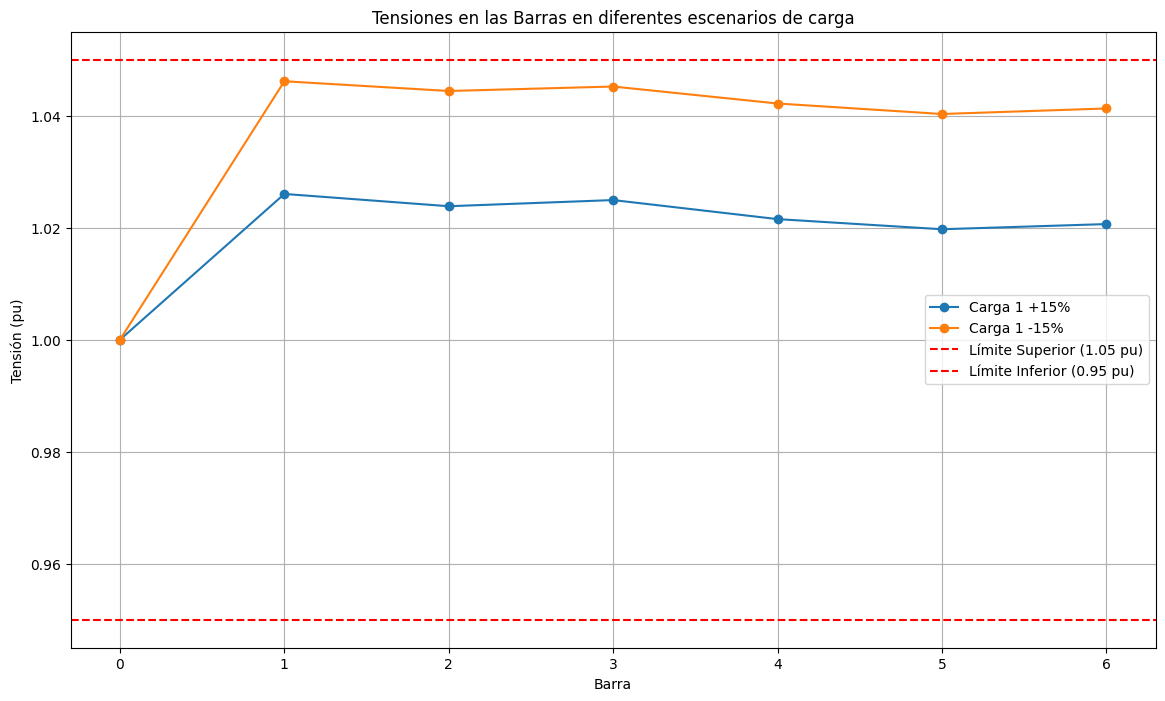

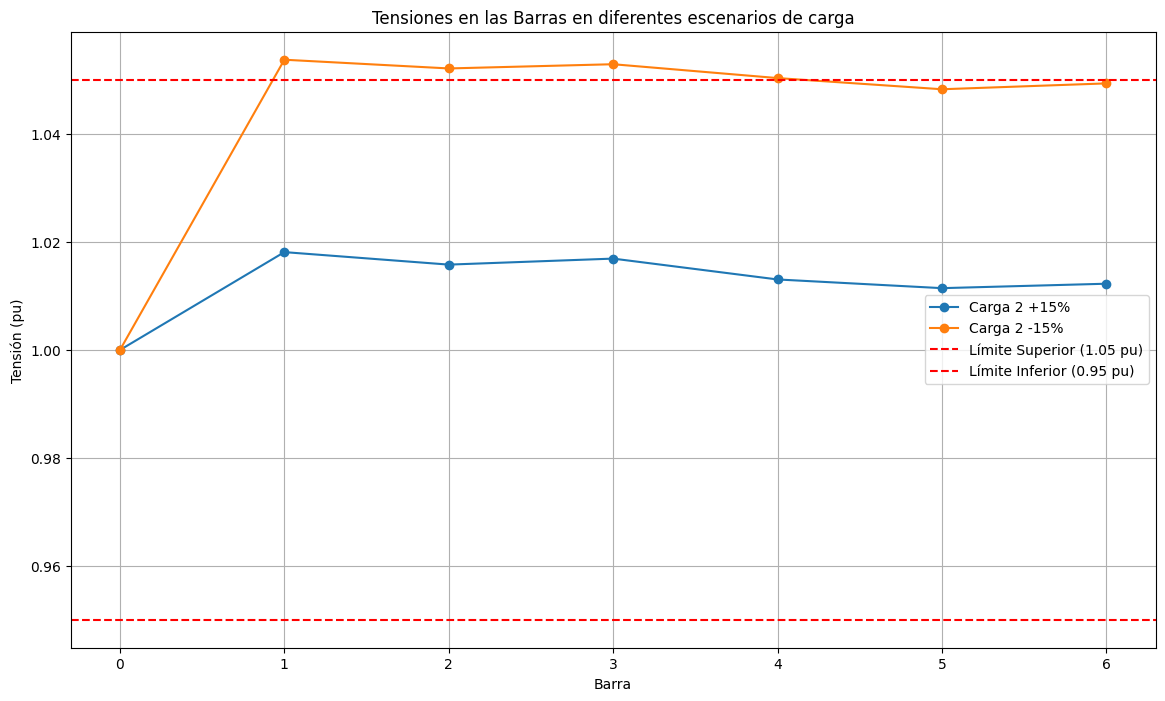

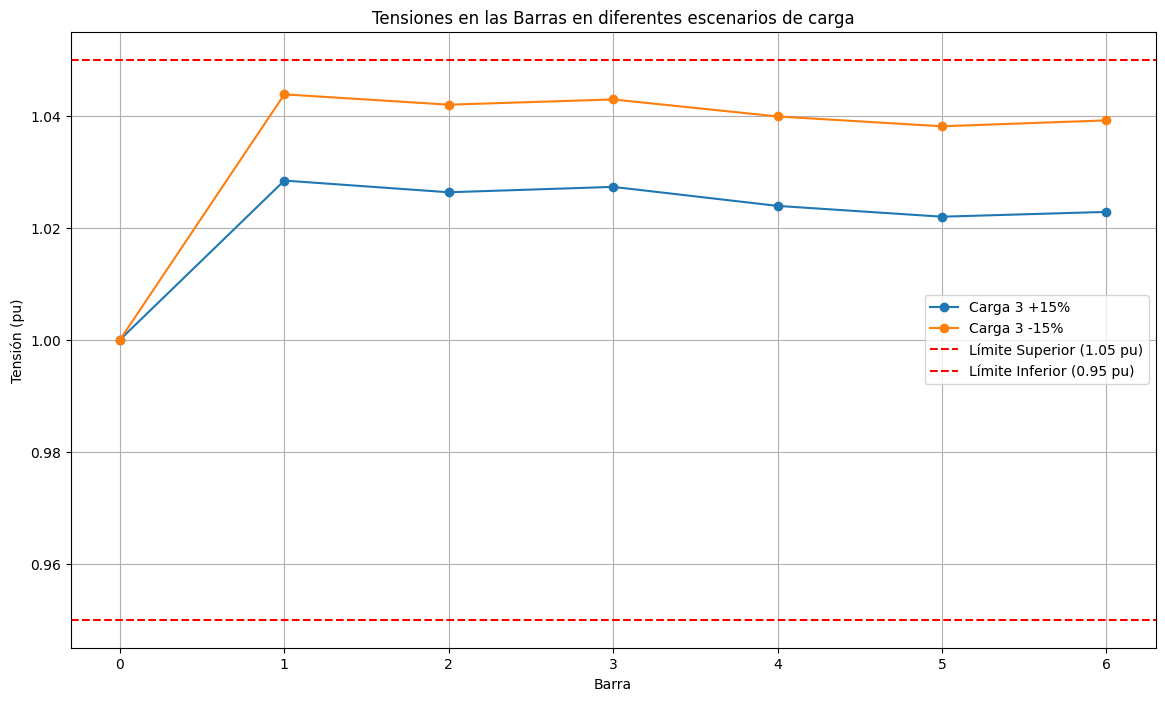

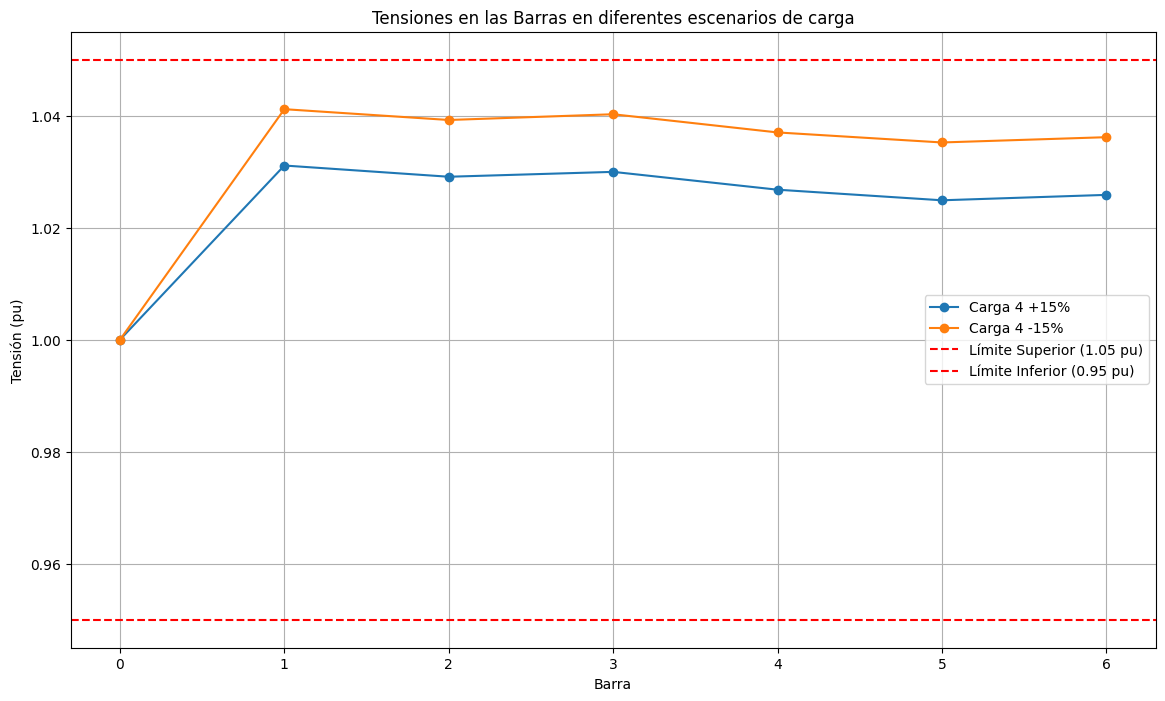

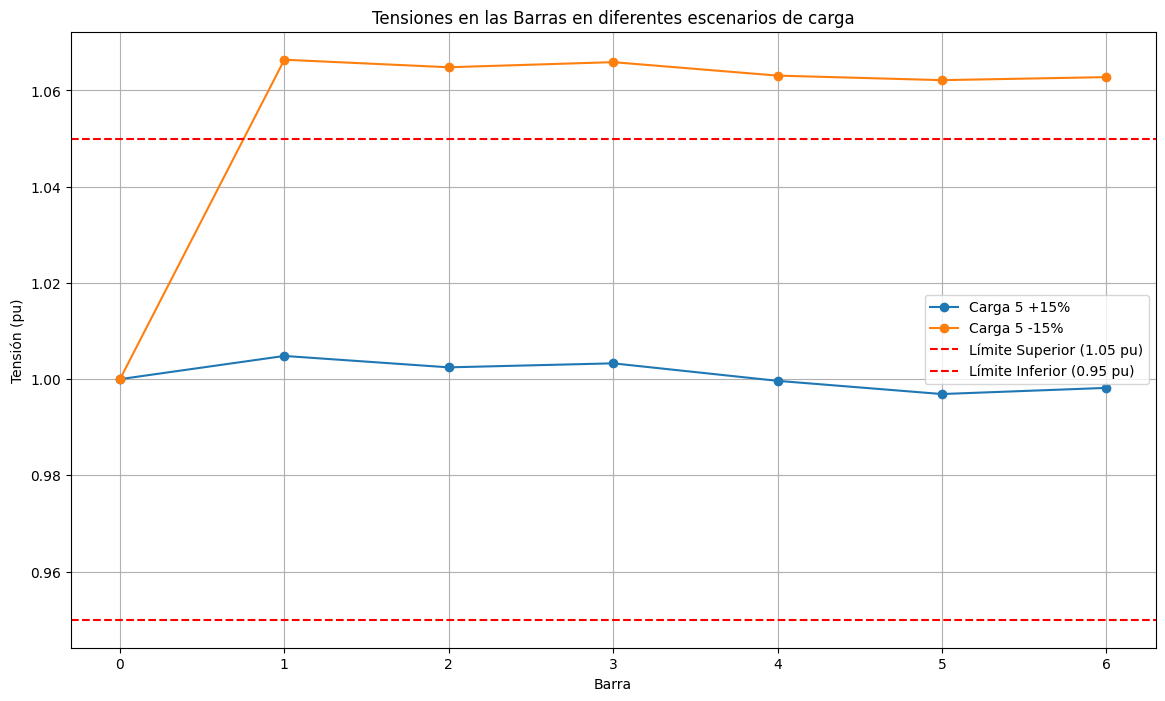

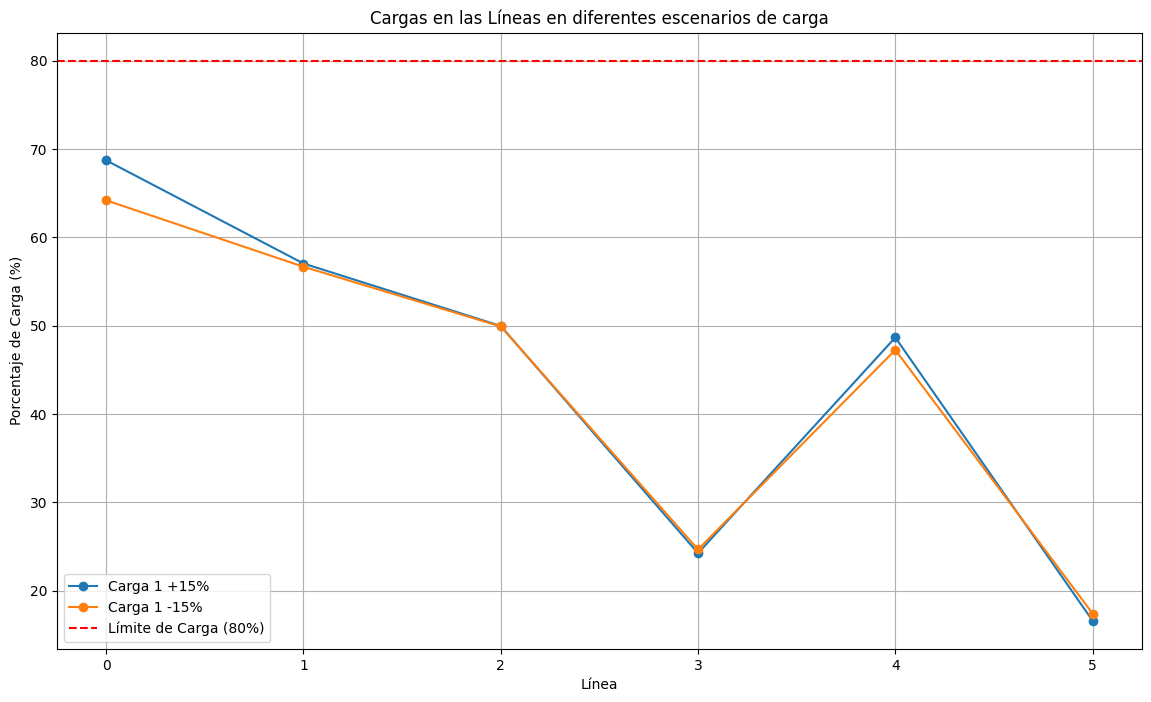

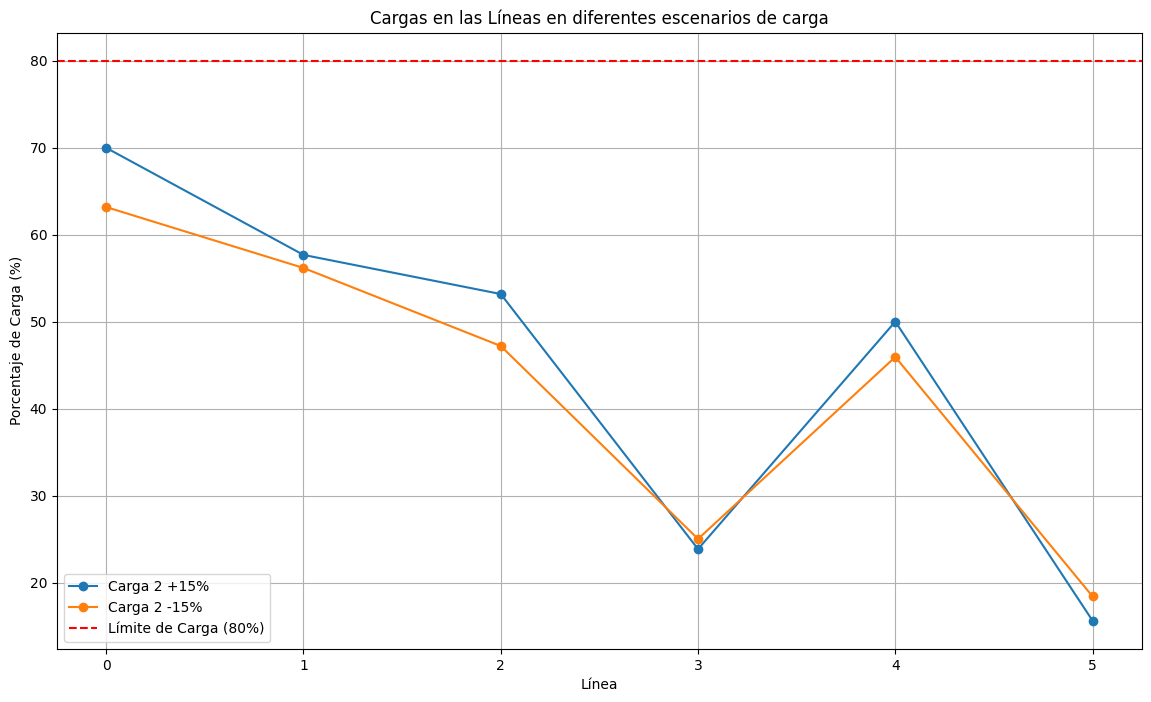

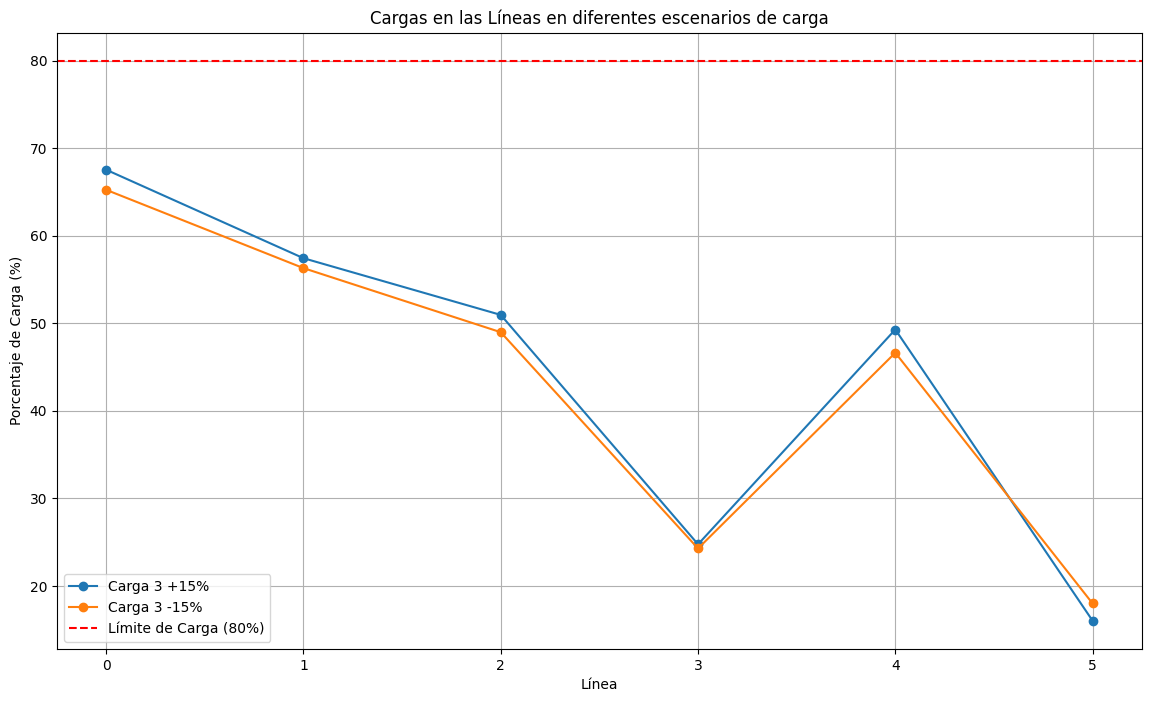

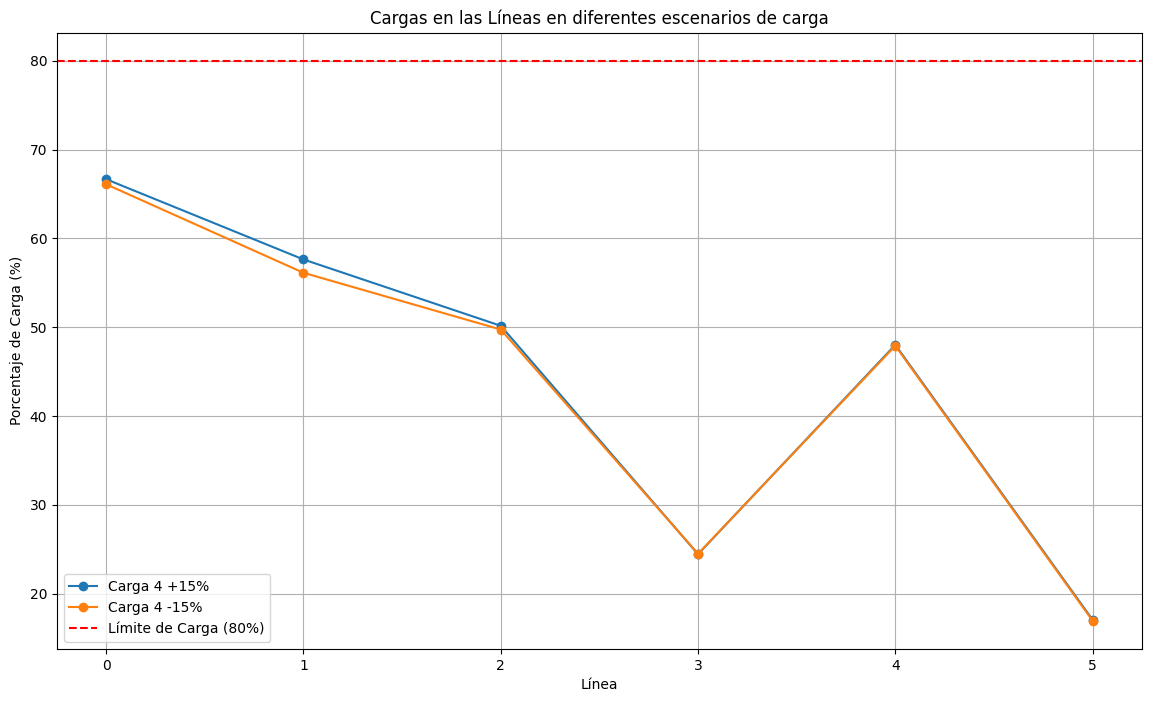

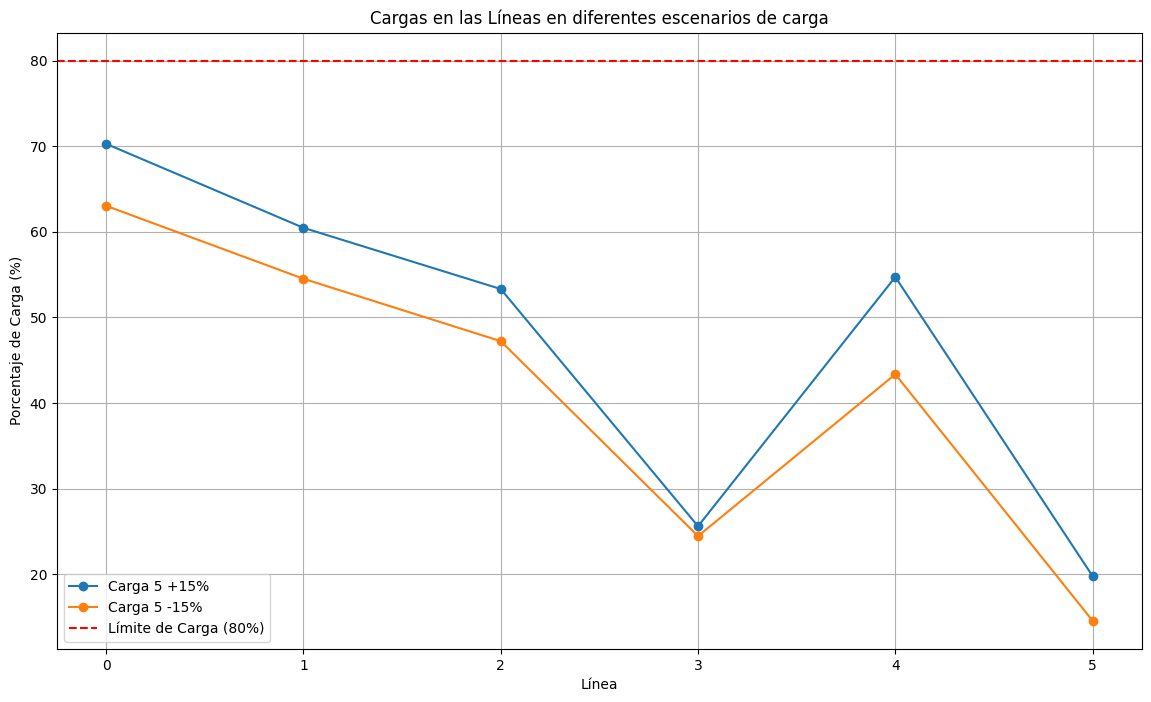

In [15]:
#Sistema 2, Figura 1(b)

#4.g) Cree tantos escenarios como cargas tenga y evalúe en cada uno de los escenarios la variación de las variables del
#     sistema al cambiar un ±15% la potencia consumida en una de las cargas.


import numpy as np
import pandas as pd
import pandapower as pp
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# Crear la red a analizar
red2 = pp.create_empty_network()

# Creación de las barras del sistema
barra_1 = pp.create_bus(red2, vn_kv=110, name="Barra 1")
barra_2 = pp.create_bus(red2, vn_kv=220, name="Barra 2")
barra_1A = pp.create_bus(red2, vn_kv=220, name="Barra 1A")
barra_1B = pp.create_bus(red2, vn_kv=220, name="Barra 1B")
barra_2A = pp.create_bus(red2, vn_kv=220, name="Barra 2A")
barra_2B = pp.create_bus(red2, vn_kv=220, name="Barra 2B")
barra_3A = pp.create_bus(red2, vn_kv=220, name="Barra 3A")

# Añadir transformador entre barra 1 y 2
pp.create_transformer(red2, barra_2, barra_1, std_type="100 MVA 220/110 kV")

# Añadir el generador en la barra 1 y que dicha barra sea la referencia
ext_grid_index = pp.create_ext_grid(red2, barra_1, va_pu=1.0, name="Slack")

# Crear las líneas
linea = "N2XS(FL)2Y 1x185 RM/35 64/110 kV"  # Línea

# Crear las líneas
pp.create_line(red2, barra_2, barra_1A, length_km=10.0, std_type=linea, name="L2-1A")
pp.create_line(red2, barra_2, barra_1B, length_km=10.0, std_type=linea, name="L2-1B")
pp.create_line(red2, barra_1A, barra_2A, length_km=15.0, std_type=linea, name="L1A-2A")
pp.create_line(red2, barra_2A, barra_3A, length_km=20.0, std_type=linea, name="L2A-3A")
pp.create_line(red2, barra_1B, barra_2B, length_km=30.0, std_type=linea, name="L1B-2B")
pp.create_line(red2, barra_2B, barra_3A, length_km=15.0, std_type=linea, name="L2B-3A")

# Crear las cargas
load_indices = [
    pp.create_load(red2, barra_1A, p_mw=30.0, q_mvar=20.0, name="Carga Barra 1A"),
    pp.create_load(red2, barra_2A, p_mw=52.5, q_mvar=35.0, name="Carga Barra 2A"),
    pp.create_load(red2, barra_3A, p_mw=22.5, q_mvar=15.0, name="Carga Barra 3A"),
    pp.create_load(red2, barra_1B, p_mw=15.0, q_mvar=10.0, name="Carga Barra 1B"),
    pp.create_load(red2, barra_2B, p_mw=90.0, q_mvar=60.0, name="Carga Barra 2B")
]

# Definir la función para variar la carga
def vary_load_and_runpp(net, load_index, percentage_change):
    original_p = net.load.at[load_index, 'p_mw']
    original_q = net.load.at[load_index, 'q_mvar']
    net.load.at[load_index, 'p_mw'] = original_p * (1 + percentage_change)
    net.load.at[load_index, 'q_mvar'] = original_q * (1 + percentage_change)
    pp.runpp(net, algorithm='nr', numba=False, max_iteration=10000, tolerance_mva=8)
    voltages = net.res_bus.vm_pu.copy()
    line_loadings = net.res_line.loading_percent.copy()
    net.load.at[load_index, 'p_mw'] = original_p  # Revertir el cambio
    net.load.at[load_index, 'q_mvar'] = original_q  # Revertir el cambio
    return voltages, line_loadings

# Crear escenarios y registrar resultados
scenarios = {}
change = 0.15
for load_index in load_indices:
    scenario_name = f"Carga {load_index + 1} {'+' if change > 0 else ''}{int(change*100)}%"
    voltages, line_loadings = vary_load_and_runpp(red2, load_index, change)
    if voltages is not None and line_loadings is not None:
        scenarios[scenario_name] = {
            "voltages": voltages,
            "line_loadings": line_loadings
        }
change = -0.15
for load_index in load_indices:
    scenario_name = f"Carga {load_index + 1} {'+' if change > 0 else ''}{int(change*100)}%"
    voltages, line_loadings = vary_load_and_runpp(red2, load_index, change)
    if voltages is not None and line_loadings is not None:
        scenarios[scenario_name] = {
            "voltages": voltages,
            "line_loadings": line_loadings
        }

for number in [1, 2, 3, 4, 5]:
    # Graficar los resultados de tensión
    plt.figure(figsize=(14, 8))
    for scenario, data in scenarios.items():
        if ("Carga " + str(number)) in scenario:
            plt.plot(red2.res_bus.index, data["voltages"], marker='o', linestyle='-', label=scenario)
    plt.axhline(y=1.05, color='r', linestyle='--', label='Límite Superior (1.05 pu)')
    plt.axhline(y=0.95, color='r', linestyle='--', label='Límite Inferior (0.95 pu)')
    plt.xlabel('Barra')
    plt.ylabel('Tensión (pu)')
    plt.title('Tensiones en las Barras en diferentes escenarios de carga')
    plt.legend()
    plt.grid(True)
    plt.show()

for number in [1, 2, 3, 4, 5]:
    # Graficar los resultados de carga de las líneas
    plt.figure(figsize=(14, 8))
    for scenario, data in scenarios.items():
        if ("Carga " + str(number)) in scenario:
            plt.plot(red2.res_line.index, data["line_loadings"], marker='o', linestyle='-', label=scenario)
    plt.axhline(y=80, color='r', linestyle='--', label='Límite de Carga (80%)')
    plt.xlabel('Línea')
    plt.ylabel('Porcentaje de Carga (%)')
    plt.title('Cargas en las Líneas en diferentes escenarios de carga')
    plt.legend()
    plt.grid(True)
    plt.show()

#4.g) Cree tantos escenarios como cargas tenga y evalúe en cada uno de los escenarios la variación de las variables del
#     sistema al cambiar un ±15% la potencia consumida en una de las cargas.

#Definiciones de cargas:
#   Carga 1 = Carga en barra 1A
#   Carga 2 = Carga en barra 2A
#   Carga 3 = Carga en barra 3A
#   Carga 4 = Carga en barra 1B
#   Carga 5 = Carga en barra 2B
#   Barra 0 = Barra 1 de referencia
#   Barra 1 = Barra 2
#   Barra 2 = Barra 1A
#   Barra 3 = Barra 2A
#   Barra 4 = Barra 3A
#   Barra 5 = Barra 1B
#   Barra 6 = Barra 2B 

#Análisis de las cargas
# Variación de tensión en las barras. 
#
# Carga en Barra 1A (carga 1):
#   En el caso de aumentar un 15% la carga en la barra 1A, todas las barras se mantienen dentro de los márgenes de operación normal.
#   En el caso de disminuir un 15% la carga en la barra 1A, todas las barras se mantienen dentro de los márgenes de operación normal.    
# Carga en Barra 2A (carga 2):
#   Cuando se baja un la carga un 15% las barras 2, 1A, 2A y 3A (1, 2, 3, 4) están por encima del límite de 1.05 pu 
#   para condición normal de operación, entrando al estado de alerta. 
#   En el caso de aumentar un 15% la carga en la barra 2A, todas las barras se mantienen dentro de los márgenes de operación normal. 
# Carga en Barra 3A (carga 3):
#   En este caso tanto al aumentar la carga o como disminuirla un 15% se tiene que las tensiones de las barras se mantienen dentro
#   de los márgenes de operacion normal.
# Carga en Barra 1B (carga 4):
#   En este caso tanto al aumentar la carga o como disminuirla un 15% se tiene que las tensiones de las barras se mantienen dentro
#   de los márgenes de operacion normal.
# Carga en Barra 2B (carga 5):
#   En el caso de aumentar un 15% la carga en la barra 1A, todas las barras se mantienen dentro de los márgenes de operación normal.
#   En el caso de disminuir un 15% la carga en la barra 1A, todas las barras a excepción de la de referencia están por encima del límite 
#   de 1.05 pu para condición normal de operación, entrando al estado de alerta.
# 

# Variación de la potencia en las líneas.
# 
# En los gráficos mostrados a continuación se observa que para todas las variaciones de cargas de todos los casos y en todas las líneas del
# sistema se mantienen bajo el umbral del 80%, por lo cual pese a la variaciones de las cargas las líneas siguen estando en operación
# normal.    